# Project:

As the MW and M31 move closer together and eventually collide, we have the opportunity to understand how the structure of these galaxies will change as this interaction occurs. This interaction produces a structure known as a tidal tail. When two galaxies get very close, the gravitational force from the two galaxies will strip and redistribute gas and stars outside the Jacobi radius into elongated structures that protrude from the galaxy. Stars outside the Jacobi radius, or Roche limit,  will become unbound and will co-orbit the second galaxy.

# The Question:

In this code I am trying to understand the formation of the tidal tails of the MW as it makes its encounter with M31. I am trying to understand the kinematics of the tidal tails. 

# The Code:
This code calculates the Jacobi radius of the MW using the distance between the MW and M31, mass of the MW, and mass enclosed of M31. Then the code plots the MW using the 2D histogram from snapshots 270-330 and marks stars outside a set radius of 30kpc as red dots. The second histogram shows the marked objects and their relative distance to the COM of the MW. Also shown on the plot is the Jacobi Radius and the mean radius of the selected particles along with its standard deviation.  

In [4]:
# external modules
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
%matplotlib inline
import numpy as np
import astropy.units as u

# my modules 
from ReadFile import Read
from CenterOfMass2 import CenterOfMass
from MassProfile import MassProfile

# I took the code from Lab 7 for making contours and made it into a separate script 
from contour import density_contour

# Jacobi Radius

In [5]:
#create a function to determine the jacobi radius at a certain snapshot 
def Rj(start,stop,n,Rj):
    '''Inputs
            Start: starting snapshot
            Stop: last snapshot
            n: difference between snapshots
            Rj: starting Rj to jump start the caclulation, start with separation of MW and M31 [Array]
        Returns:
            x: 3D array that stores the snapshot number, jacobi radius, and distance between the MW and M31 '''
    
    #create an array of snapshots 
    snap_ids=np.arange(start,stop,n)
    
    #make 3D array to make looking at jacobi radius and distance between the MW and MW at any snapshot easier
    x=np.zeros([len(snap_ids),3])
    if len(snap_ids)==0:
        print("Ooops thats not valid")


    # a for loop to calculate the Jacobi radius and the distance between the MW and M31 at each snapshot
    for i, snap_id in enumerate(snap_ids): # loop over files

        # compose the data filename (be careful about the folder)
        ilbl = '000'+ str(snap_id)
        ilbl = ilbl[-3:] #remove first three numbers of string
        
        #create filename
        filenameMW= "%s_"%('MW') + ilbl + '.txt'
        filenameM31= "%s_"%('M31') + ilbl + '.txt'

        # Initialize an instance of CenterOfMass class, using disk particles
        COMMW=CenterOfMass(filenameMW,2)
        COMM31=CenterOfMass(filenameM31,2)

        # Compute COM of the MW and M31 at the new position using disk particles
        COMPMW = COMMW.COM_P(0.1, 2)
        COMPM31 = COMM31.COM_P(0.1, 2) 
        
        
        #distance between MW COM and M31 COM
        RMW = np.sqrt(COMPMW[0]**2+COMPMW[1]**2+COMPMW[2]**2)
        RM31= np.sqrt(COMPM31[0]**2+COMPM31[1]**2+COMPM31[2]**2)
        R_Dist= np.abs(RM31-RMW)

        #Instance for MassProfile
        MW=MassProfile('MW',snap_id)
        M31=MassProfile('M31',snap_id)

        #Mass enclosed
        MW_Encl=MW.MassEnclosed(2,Rj)
        M31_Encl=M31.MassEnclosed(2,[R_Dist.value])

        #Jacobi radius
        Rj= (R_Dist * (MW_Encl/(2*M31_Encl))**(1/3)).value
        snapshot=snap_id
        
        #store snapshot number and jacobi radius at snapshot to 2D array 
        x[i][0]=snapshot
        x[i][1]=Rj[len(Rj)-1]
        x[i][2]=R_Dist.value
        
    return x


In [6]:
#use rj to jump start the Jacobi radius calculation
rj=np.arange(760,770,0.1)

#calculate the Jacobi radius from Snapshot 270-330
Jacobi=Rj(270,331,5,rj)
print(Jacobi)

[[270.          26.92082981  39.6243163 ]
 [275.           2.5542332    2.19136173]
 [280.          16.29984875  34.20265792]
 [285.          40.06133703  61.56074264]
 [290.          55.56266137  81.89305459]
 [295.          66.38678401  97.8326627 ]
 [300.          75.08700487 110.65338601]
 [305.          82.42575204 121.47021346]
 [310.          88.17508719 129.94388982]
 [315.          92.55809838 136.40351034]
 [320.          95.76731908 141.13396493]
 [325.          98.86144047 145.69589805]
 [330.         100.05290986 147.45443434]]


In [7]:
#store the Jacobi radius to be used to plot on plots below
y=np.zeros(len(Jacobi))
for i in range(len(Jacobi)):
    y[i]=Jacobi[i][1]
y

array([ 26.92082981,   2.5542332 ,  16.29984875,  40.06133703,
        55.56266137,  66.38678401,  75.08700487,  82.42575204,
        88.17508719,  92.55809838,  95.76731908,  98.86144047,
       100.05290986])

# Visualization

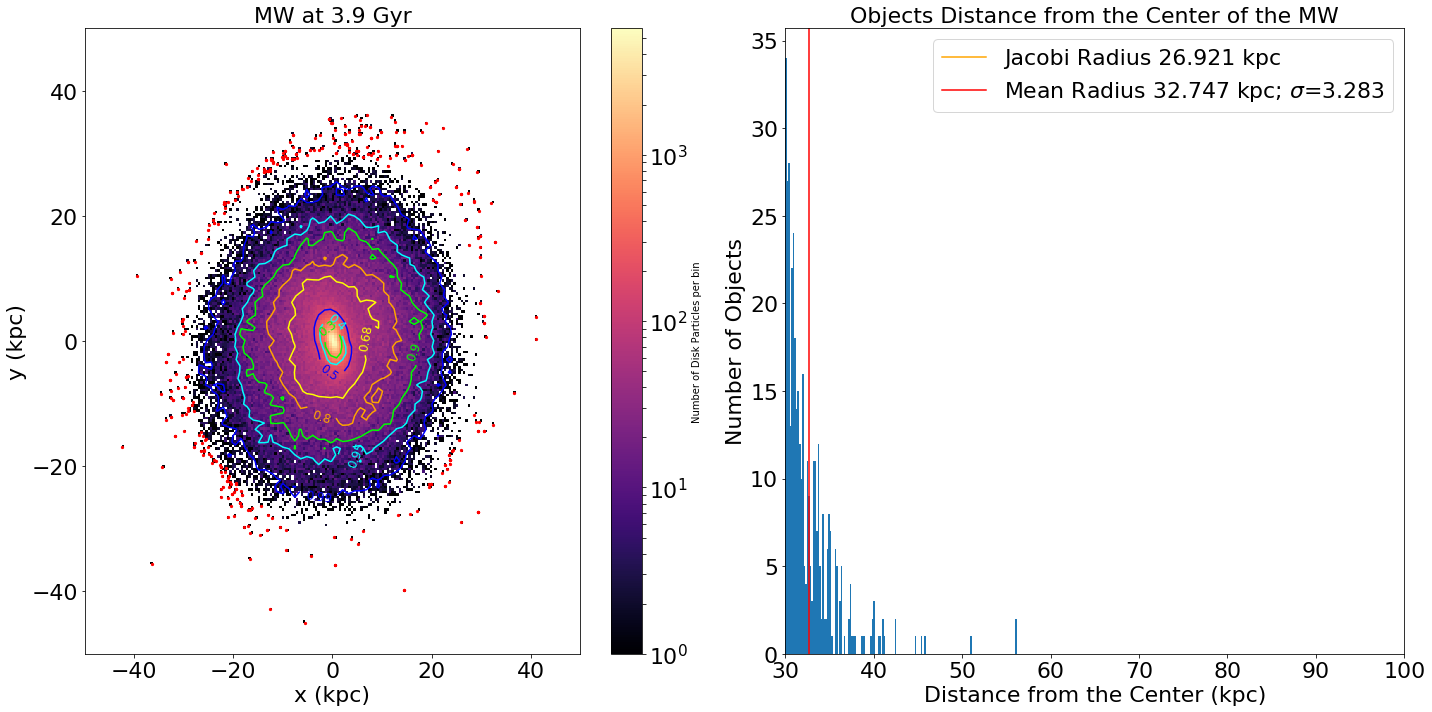

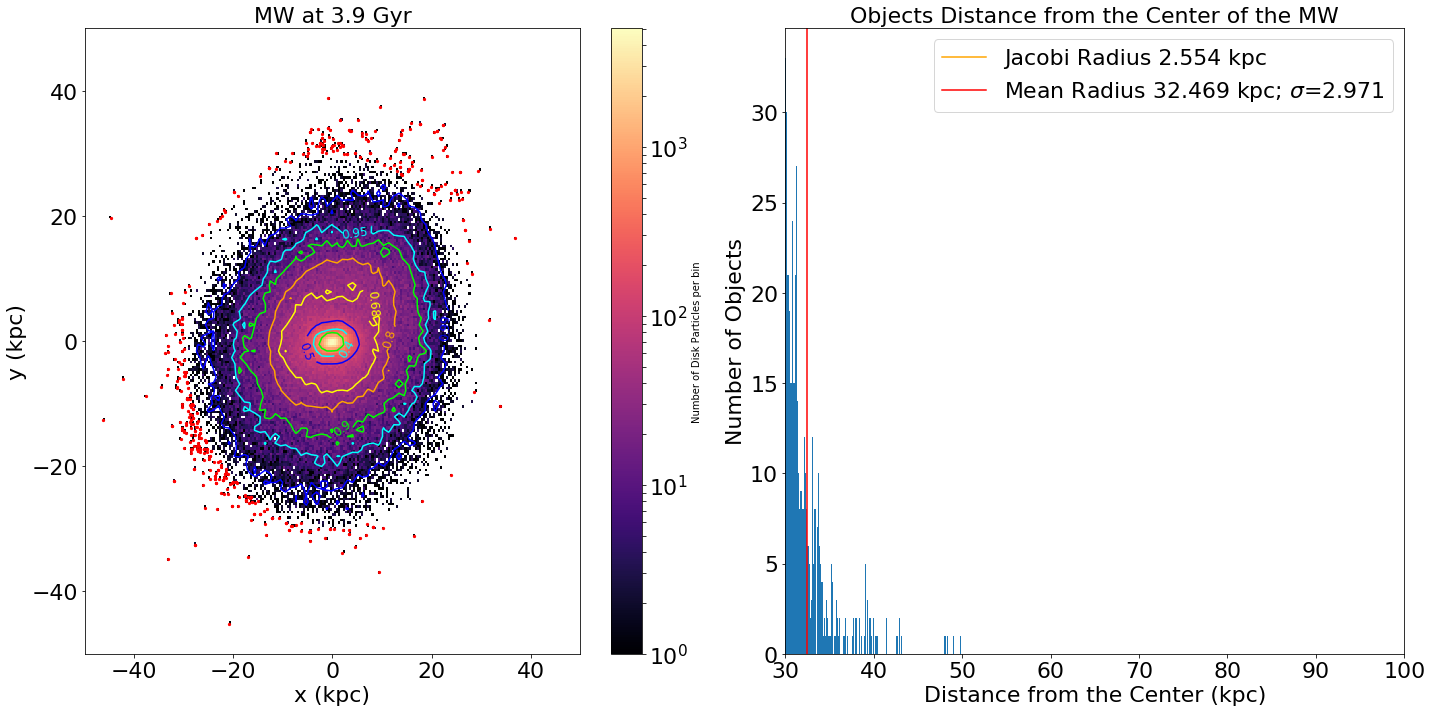

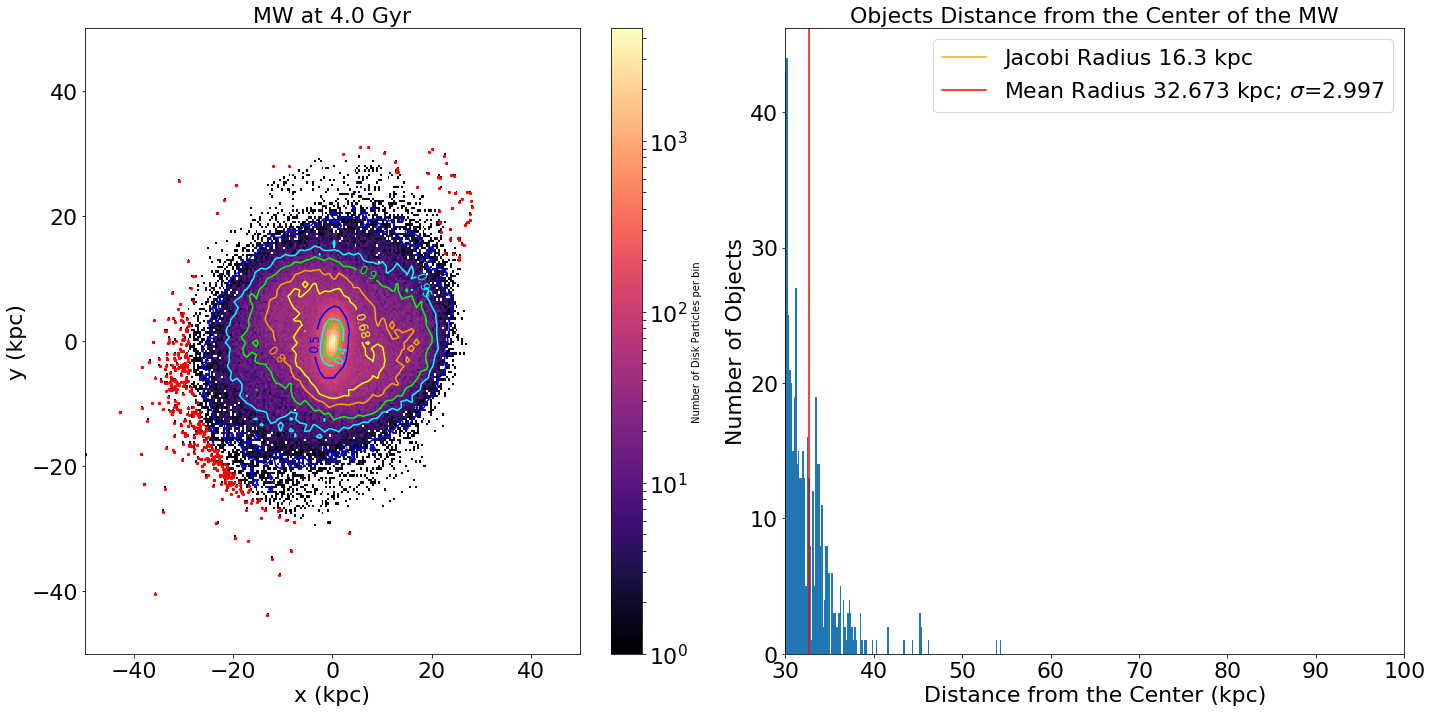

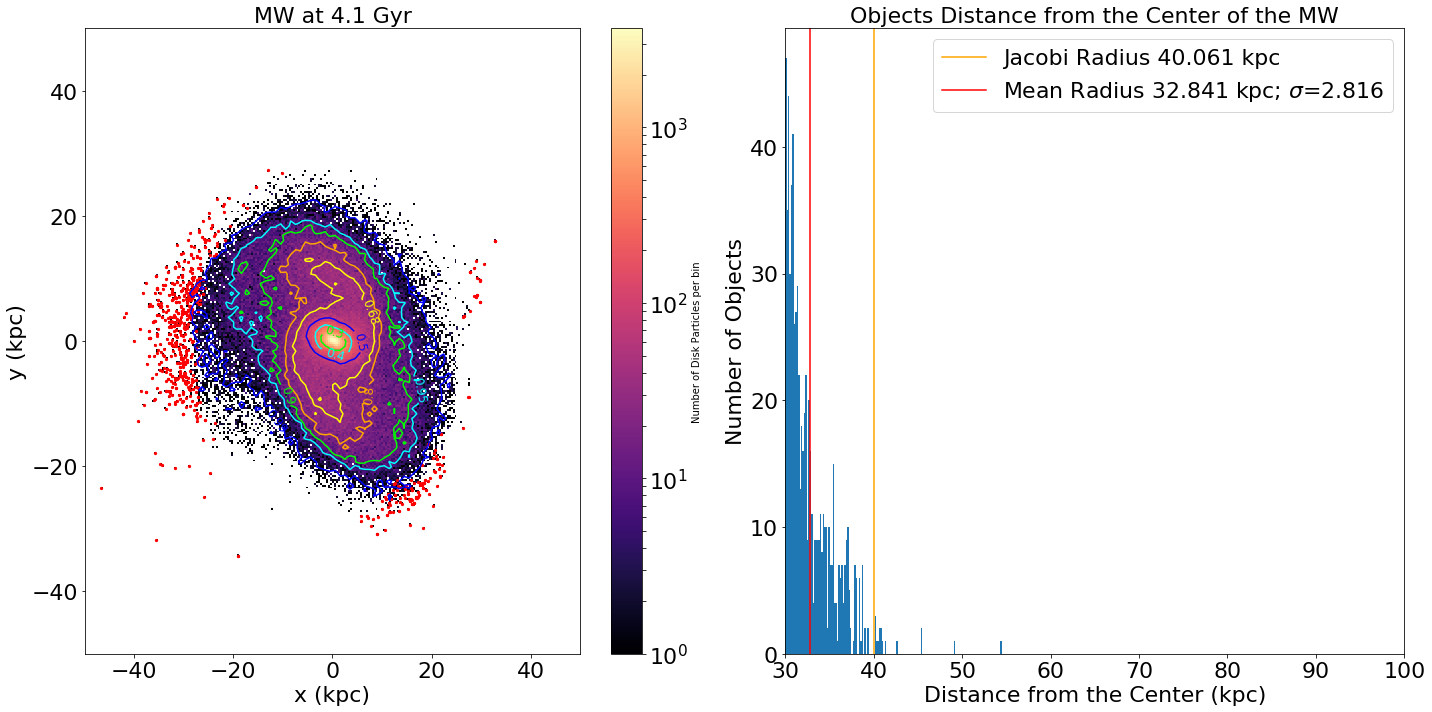

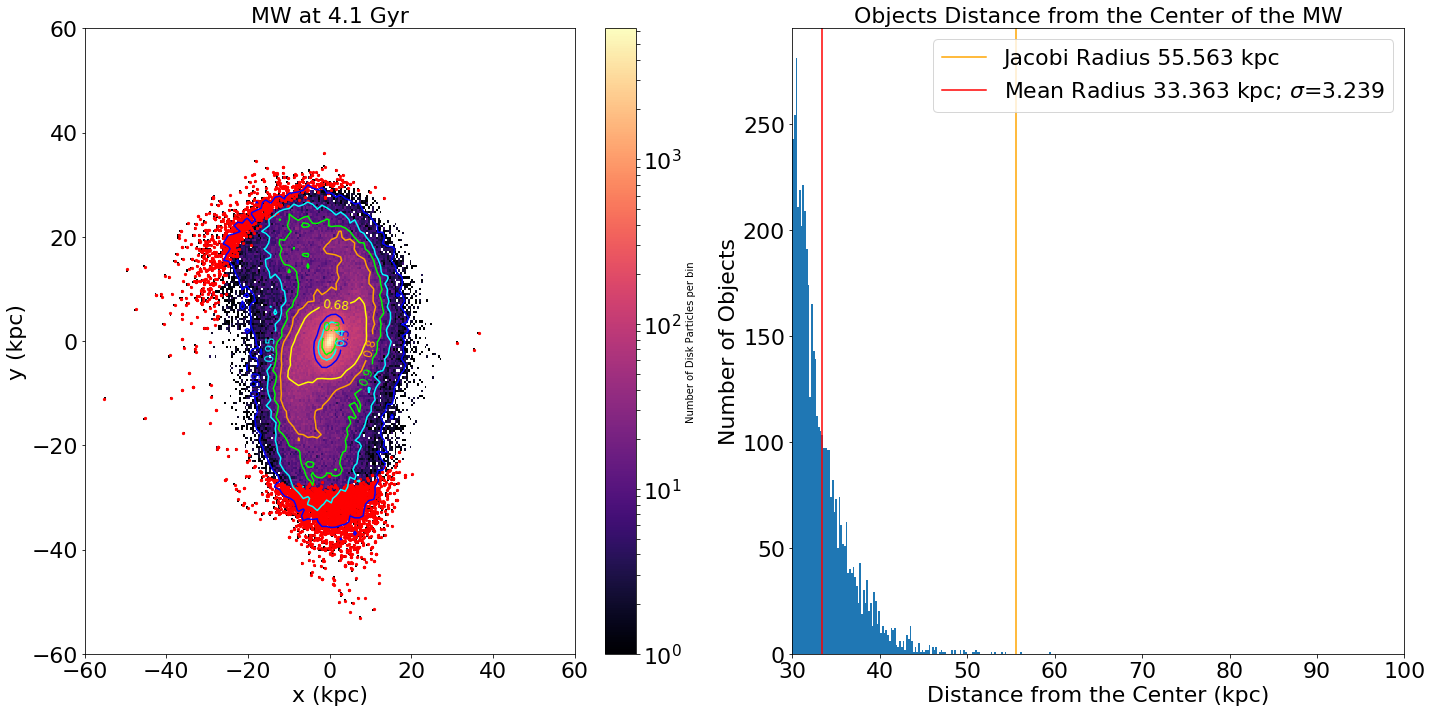

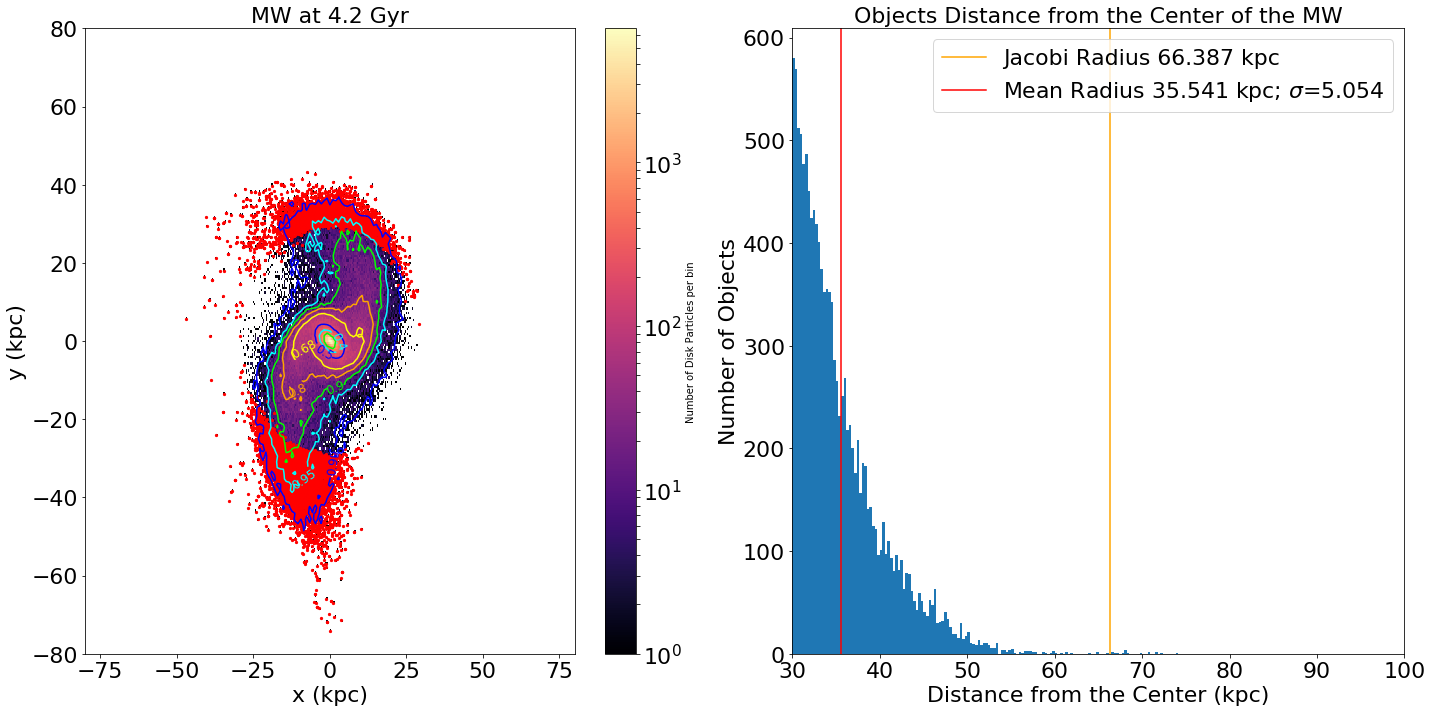

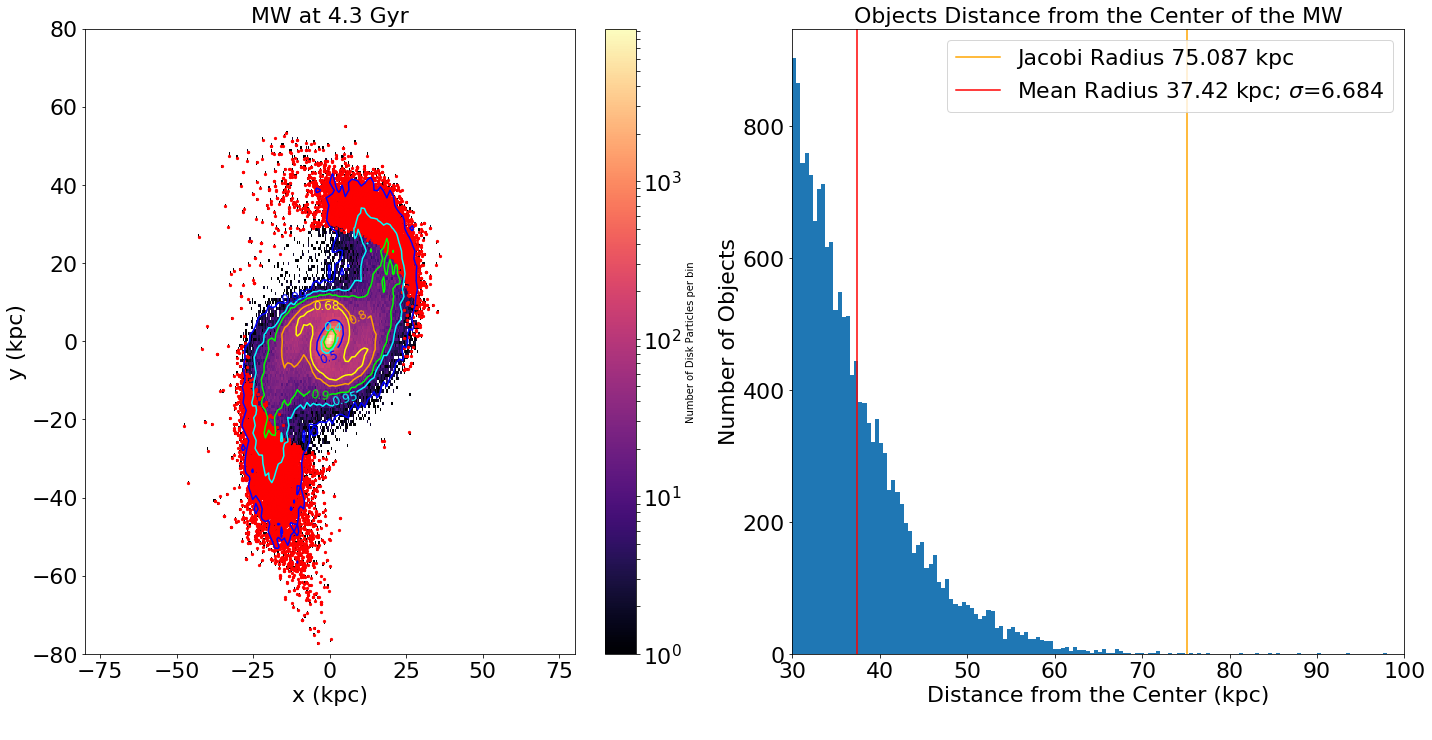

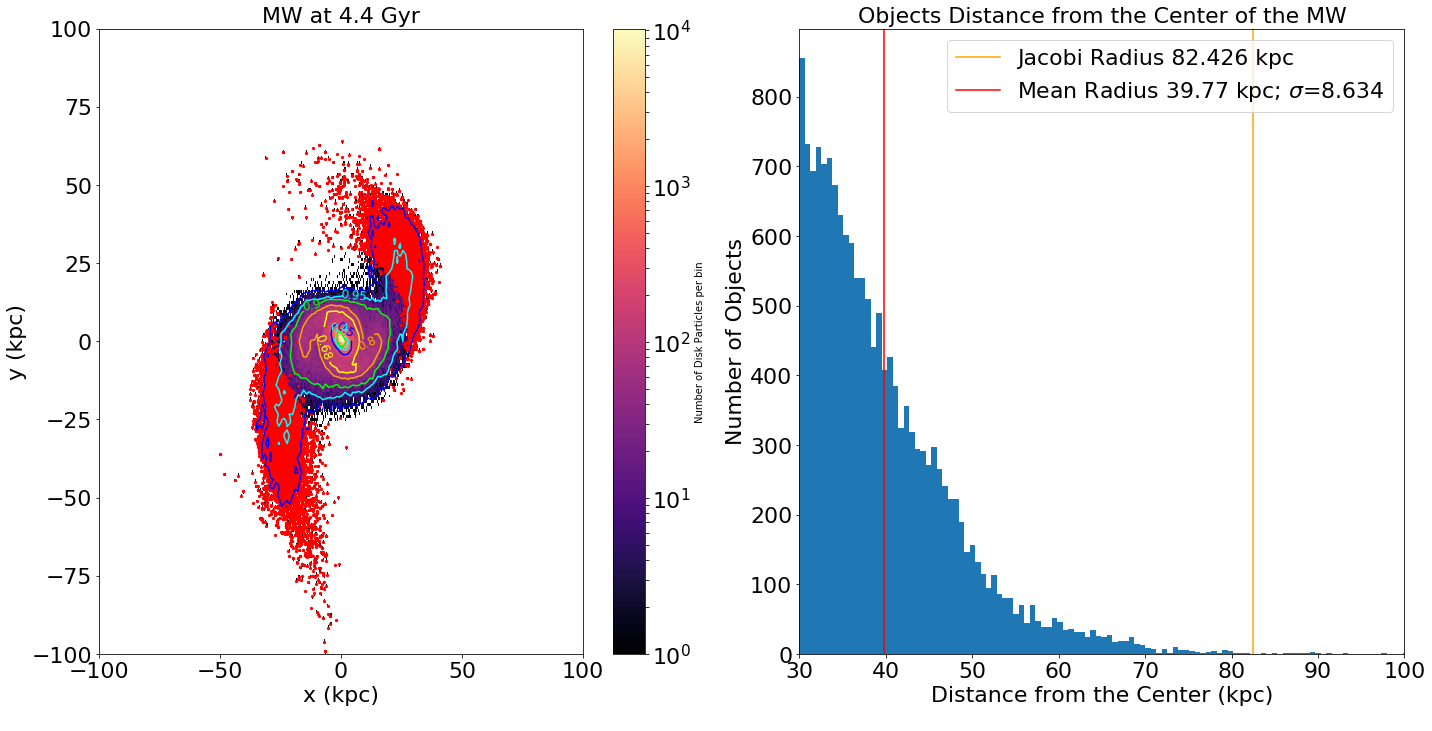

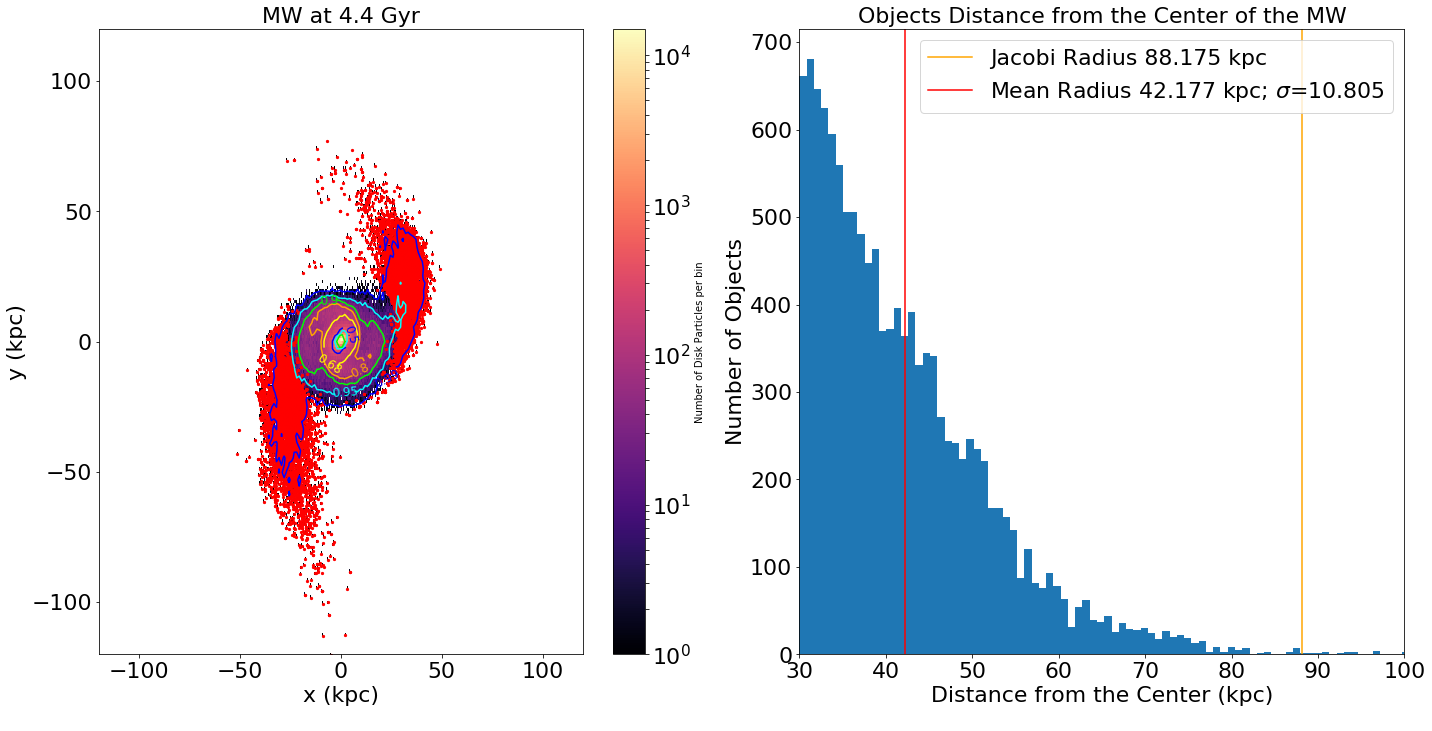

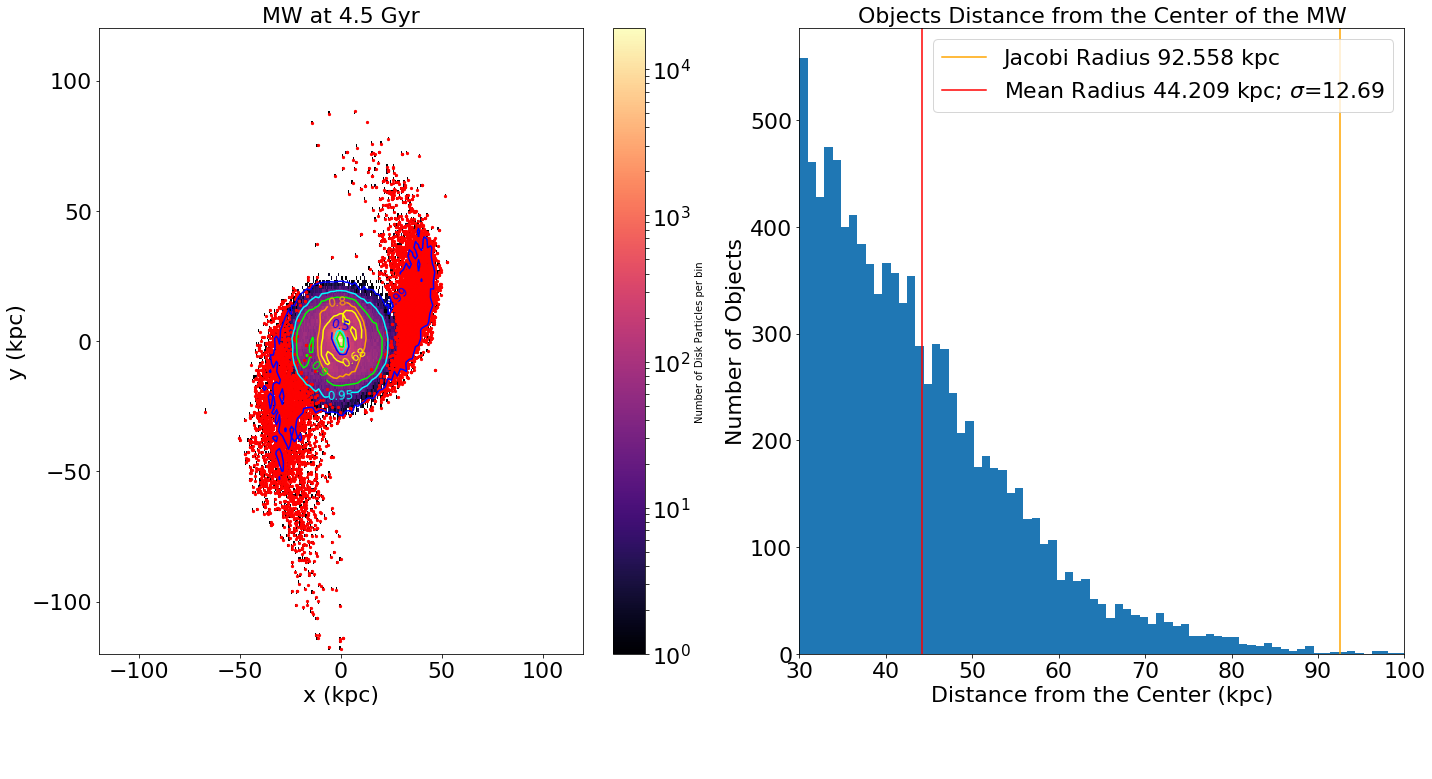

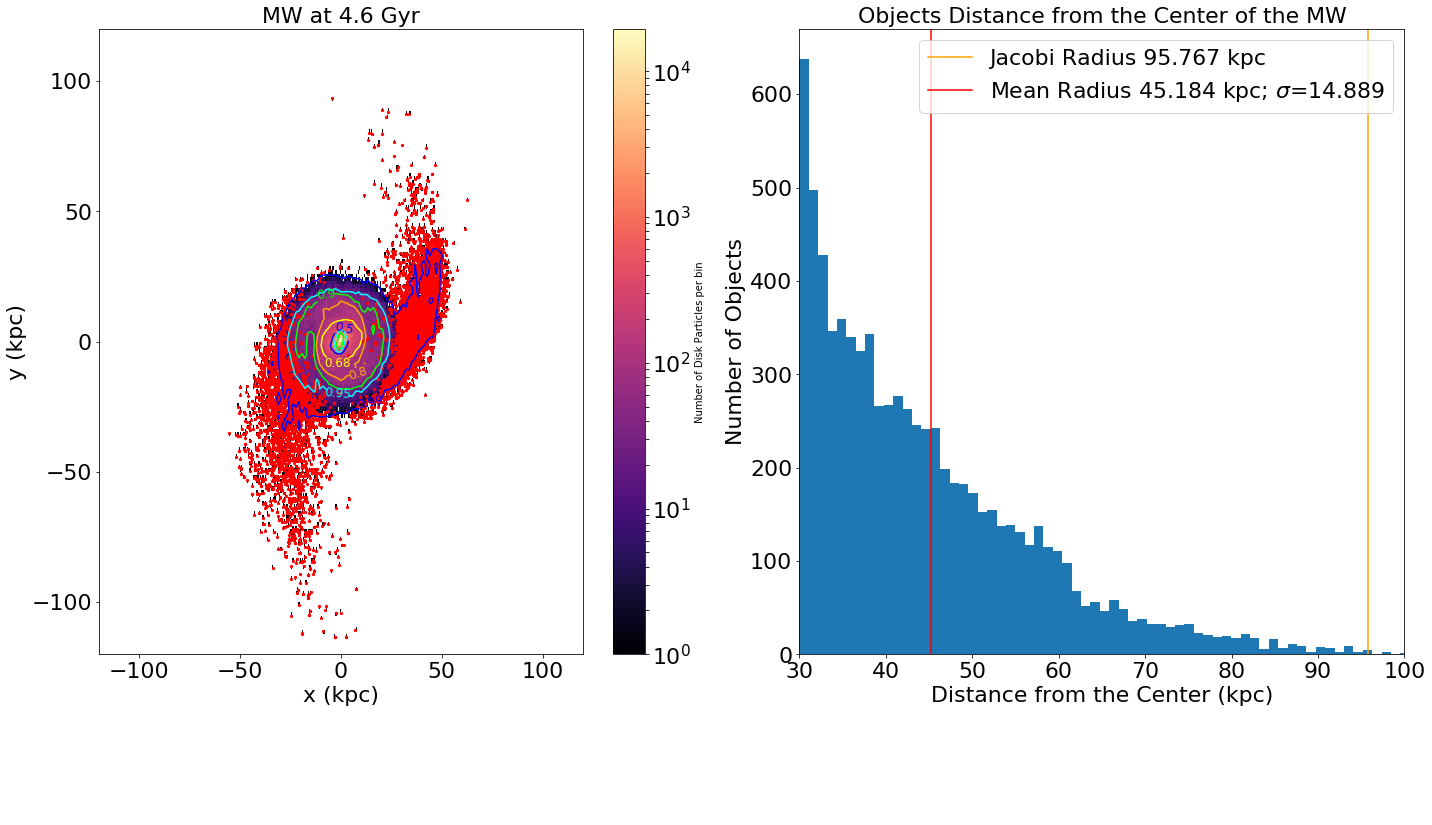

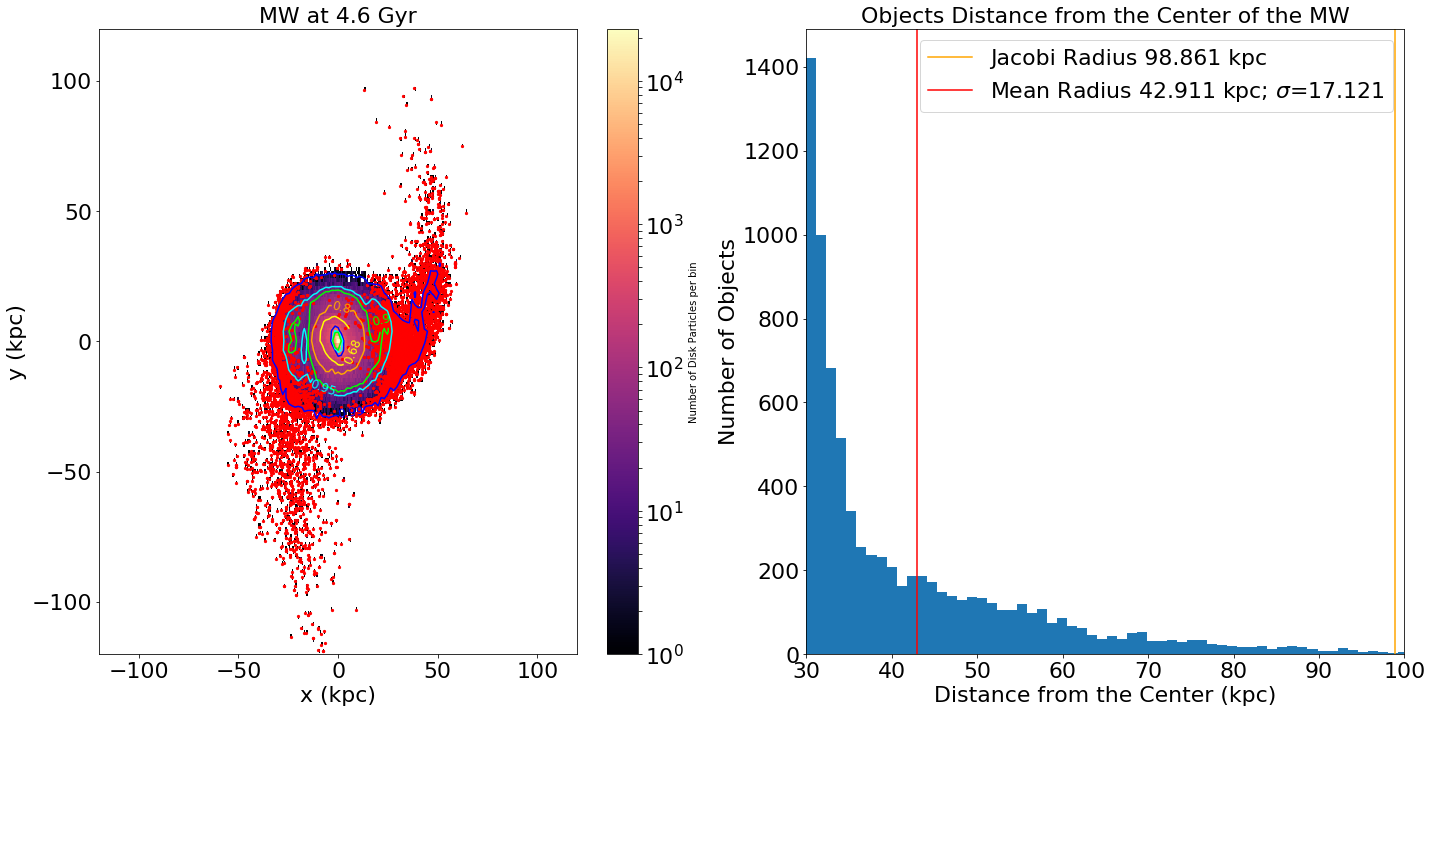

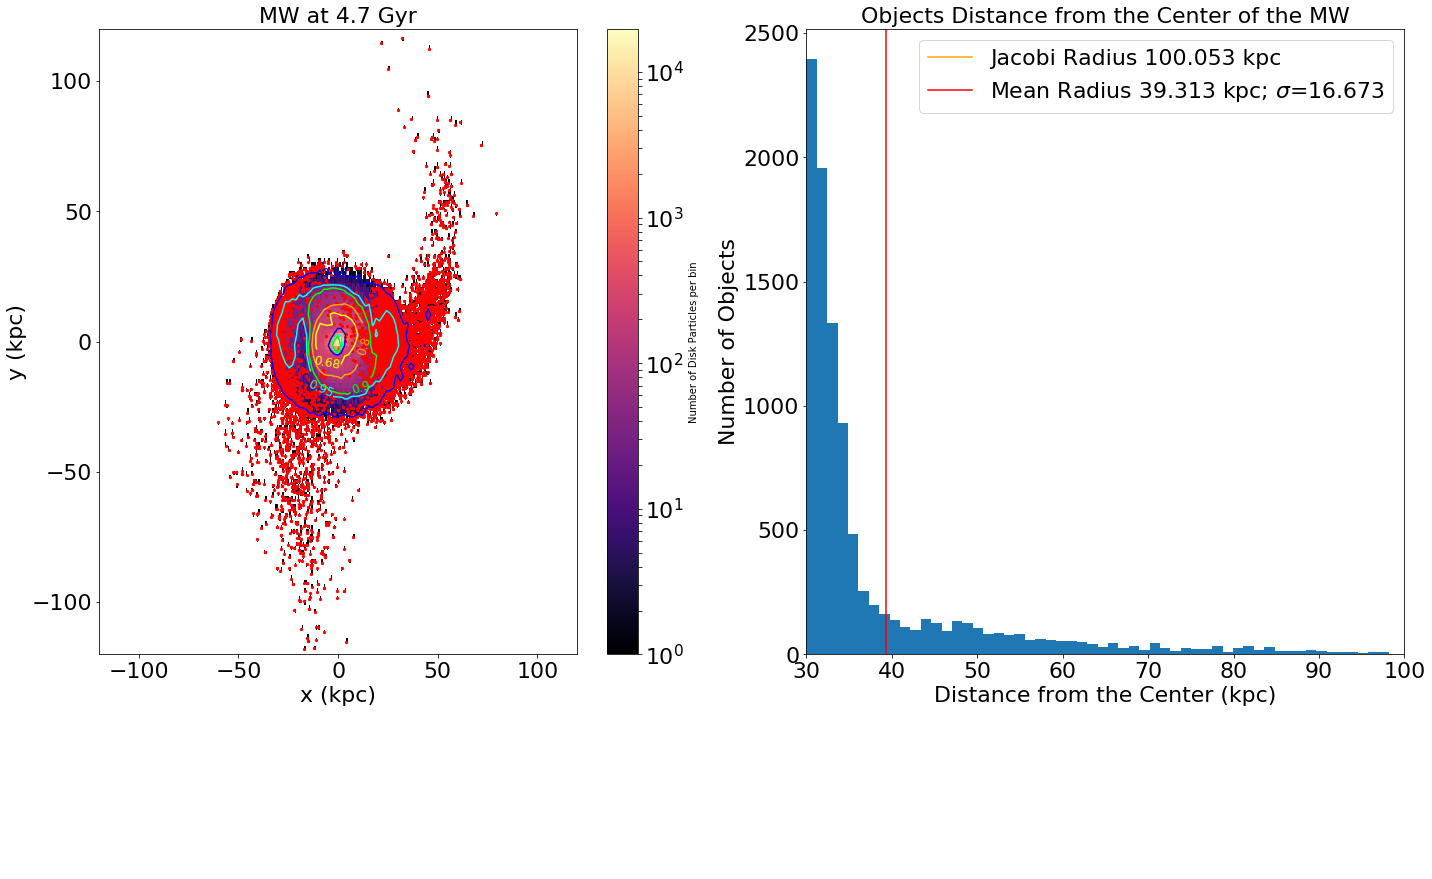

In [26]:
#Visualize the tails at different snapshots to compare them 

#range of snapshots
snap_ids=np.arange(270,331,5)
if len(snap_ids)==0:
    print("Ooops thats not valid")

# a for loop to visualize the MW (w/ selected particles) and the average distance to the COM of the MW
for i, snap_id in enumerate(snap_ids): # loop over files

    # compose the filename
    ilbl = '000'+ str(snap_id)
    ilbl = ilbl[-3:] #remove last three lines
    filenameMW= "%s_"%('MW') + ilbl + '.txt'
    
    Mean=0
    std=0
    
    # Initialize an instance of CenterOfMass class, using disk particles
    COMMW=CenterOfMass(filenameMW,2)
    
    # Compute COM of the MW at the new position using disk particles
    COMPMW = COMMW.COM_P(0.1, 2)
    COMVMW= COMMW.COM_V(COMPMW[0],COMPMW[1],COMPMW[2])
    
    # Determine positions of disk particles relative to COM 
    MW_Disk_x = COMMW.x - COMPMW[0].value
    MW_Disk_y = COMMW.y - COMPMW[1].value
    MW_Disk_z = COMMW.z - COMPMW[2].value
    
    #create an index to select particles outside a set 30 kpc radius
    RMWhist=np.sqrt(MW_Disk_x**2+MW_Disk_y**2+MW_Disk_z**2)
    Radius=30
    index=np.where(RMWhist>Radius)
    
    #calculate the mean radius of the objects outside the 30kpc radius
    Mean=np.sum(RMWhist[index])/len(MW_Disk_x[index])
    std=np.sqrt(np.sum((RMWhist[index]-Mean)**2)/(len(RMWhist[index]-1)))
    
    #begin plot
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 10))
    
    #make a 2d hist plot to visualize the MW through snapshots
    f=ax1.hist2d(MW_Disk_x, MW_Disk_y, bins=200, norm=LogNorm(), cmap='magma')
    plt.colorbar(f[3], ax=ax1, label='Number of Disk Particles per bin')
    
    #display selected particles
    ax1.scatter(MW_Disk_x[index], MW_Disk_y[index], s=5, color='red')
    
    #right plot that shows the distance of the selected particles from the COM of the MW
    ax2.hist(RMWhist[index], bins=150)
    
    #Place a line at the jacobi radius
    ax2.axvline(x=y[i], color='orange', label='Jacobi Radius '+str(np.round(y[i],3))+' kpc')
    
    #place a line at the mean radius of the selected particles
    ax2.axvline(x=Mean, color='red', label='Mean Radius '+str(np.round(Mean,3))+ r' kpc; $\sigma$='+str(np.round(std,3)))
    
    #use density contour to show structure of the tidal tails
    density_contour(MW_Disk_x, MW_Disk_y, 80, 80, ax=ax1, colors=['blue','cyan','lime','orange','yellow'])
    

    # Add axis labels
    ax1.set_xlabel('x (kpc)', fontsize=22)
    ax1.set_ylabel('y (kpc)', fontsize=22)
    ax2.set_xlabel('Distance from the Center (kpc)', fontsize=22)
    ax2.set_ylabel('Number of Objects', fontsize=22)

    #Title
    ax1.set_title('MW at '+str(np.round(14.286e6*snap_id/1e9,1))+ ' Gyr',fontsize=22)
    ax2.set_title('Objects Distance from the Center of the MW',fontsize=22)
    
    #legend
    ax2.legend(loc='upper right',fontsize=22)


    #limits (change lim to better see the tidal tails)
    if snap_id < 290:
        ax1.set_ylim(-50,50)
        ax1.set_xlim(-50,50)
    elif snap_id < 295:
        ax1.set_ylim(-60,60)
        ax1.set_xlim(-60,60)
    elif snap_id < 305:
        ax1.set_ylim(-80,80)
        ax1.set_xlim(-80,80)
    elif snap_id < 310:
        ax1.set_ylim(-100,100)
        ax1.set_xlim(-100,100)
    elif snap_id < 331:
        ax1.set_ylim(-120,120)
        ax1.set_xlim(-120,120)
    ax2.set_xlim(30,100)
    
    #adjust tick label font size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size
    save='fig'+ str(i)
    plt.savefig(save)
    plt.tight_layout()
    plt.show()


